# Validation Testing

In this notebook we're going to test the validation procedures, such as Logic (Trace Driven Simulation) and Input (Quasi Trace Driven Simulation). 

#### Importing

In [52]:
from dtwinpylib.dtwinpy.Digital_Twin import Digital_Twin

import importlib
import dtwinpylib
importlib.reload(dtwinpylib.dtwinpy.Digital_Twin) #reload this specifc module to upadte the class

<module 'dtwinpylib.dtwinpy.Digital_Twin' from 'c:\\Users\\pedro\\Github Repositories\\Digital_Twin\\Digital Twin\\dtwinpylib\\dtwinpy\\Digital_Twin.py'>

### Normal Digital Twin simulation

Here we're just going to run a simple simulation using the Digital Twin itself and not just the digital model

==========  Reading the Model: model_2stations_closed  ==========
===> Big Picture
Total number of Machines: 2
Total number of Queues: 2

===>Detailed view of Queues:
----------------
Queue 1
Arc links: [1, 2]
Capacity: 10
Queue Lenght: 0
----------------
Queue 2
Arc links: [2, 1]
Capacity: 5
Parts stored: Part 1
Parts stored: Part 2
Parts stored: Part 3
Parts stored: Part 4
Queue Lenght: 4

===>Detailed view of Machines:
----------------
> Machine 1
--Queue In:--
Queue 2
--Queue Out:--
Queue 1
----------------
> Machine 2
--Queue In:--
Queue 1
--Queue Out:--
Queue 2
### ============ Simulation Started ============ ###
Time: 0 - [Machine 1] got Part 1 from Queue 2 (capacity= 3)
Time: 5 - [Machine 1] put Part 1 in Queue 1 (capacity = 1)
Time: 5 - [Machine 1] got Part 2 from Queue 2 (capacity= 2)
Time: 5 - [Machine 2] got Part 1 from Queue 1 (capacity= 0)
Time: 10 - [Machine 1] put Part 2 in Queue 1 (capacity = 1)
Time: 10 - [Machine 1] got Part 3 from Queue 2 (capacity= 1)
Time: 10 - [T

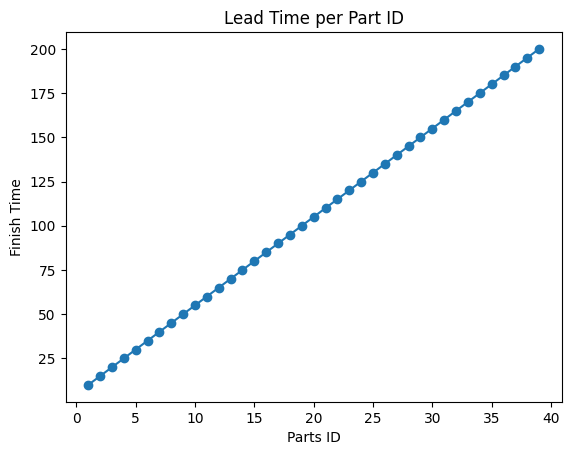

>>> *** SYSTEM THROUGHPUT: 0.195 [parts / time unit] ***
######## Running Analysis ########
Number of Parts finished: 39
Total time of Simulation: 200
List of IDs (AS IS): [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39]
>>> Cycle Time of each part:
[10, 15, 20, 25, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20]
- Maximum Cycle Time: 25
- Minimum Cycle Time: 10
*** AVERAGE CYCLE TIME OF THE SYSTEM: 19.743589743589745 [time unit]***


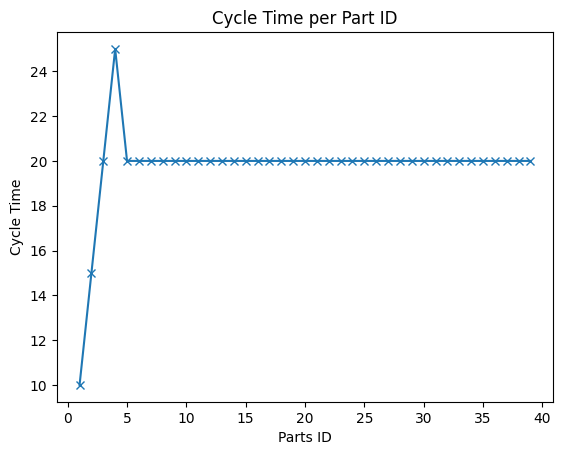

<Figure size 640x480 with 0 Axes>

In [7]:
digital_twin_1 = Digital_Twin(name= "model_2stations_closed",
    model_path= "models/model_2stations_closed.json",
    database_path="databases/2stations_closed_db.db",
    until= 201, initial=True )

digital_twin_1.run_digital_model()

## 2s-model: Testing Allocation of processes time for Part (ptime_TDS) and for Machine (ptime_qTDS)

First, initiate the Digital Twin and create the digital model

In [50]:
digital_twin = Digital_Twin(name= "model_2stations_closed",
    model_path= "models/model_2stations_closed.json",
    database_path="databases/2stations_closed_db.db",
    until= 4000, initial=True, maxparts=6)

digital_model = digital_twin.generate_digital_model()

==========  Reading the Model: model_2stations_closed  ==========
===> Big Picture
Total number of Machines: 2
Total number of Queues: 2

===>Detailed view of Queues:
----------------
Queue 1
Arc links: [1, 2]
Capacity: 10
Queue Lenght: 0
----------------
Queue 2
Arc links: [2, 1]
Capacity: 5
Parts stored: Part 1
Part Processes for Trace Driven Simulation: None
Parts stored: Part 2
Part Processes for Trace Driven Simulation: None
Parts stored: Part 3
Part Processes for Trace Driven Simulation: None
Queue Lenght: 3

===>Detailed view of Machines:
----------------
> Machine 1
--Queue In:--
Queue 2
--Queue Out:--
Queue 1
---Process Time for quasi Trace Driven Simulation---
None
----------------
> Machine 2
--Queue In:--
Queue 1
--Queue Out:--
Queue 2
---Process Time for quasi Trace Driven Simulation---
None


Create the vectors with the process time trace for each part (Trace Driven Simulation)
> The process time that the part need for each "cluster" of machines

In [51]:
matrix_ptime_TDS = [
    [10,10],
    [15,15],
    [20,20],
    [100,100]
]

Create the vectors with the process time for each machine (quasi Trace Driven Simulation)
> The process time that the machine need for each part being processed

In [52]:
matrix_ptime_qTDS = [
    [1000,100,100,100],
    [2000,200,200,200],
]

Run the validation to do the allocation and run the simulation

In [53]:
digital_twin.run_validation(matrix_ptime_qTDS=matrix_ptime_qTDS, matrix_ptime_TDS=matrix_ptime_TDS)

==========  Reading the Model: model_2stations_closed  ==========
===> Big Picture
Total number of Machines: 2
Total number of Queues: 2

===>Detailed view of Queues:
----------------
Queue 1
Arc links: [1, 2]
Capacity: 10
Queue Lenght: 0
----------------
Queue 2
Arc links: [2, 1]
Capacity: 5
Parts stored: Part 1
Part Processes for Trace Driven Simulation: None
Parts stored: Part 2
Part Processes for Trace Driven Simulation: None
Parts stored: Part 3
Part Processes for Trace Driven Simulation: None
Queue Lenght: 3

===>Detailed view of Machines:
----------------
> Machine 1
--Queue In:--
Queue 2
--Queue Out:--
Queue 1
---Process Time for quasi Trace Driven Simulation---
None
----------------
> Machine 2
--Queue In:--
Queue 1
--Queue Out:--
Queue 2
---Process Time for quasi Trace Driven Simulation---
None
============ Running Trace Driven Simulation ============
### ============ Simulation Started ============ ###
Time: 0 - [Machine 1] got Part 1 from Queue 2 (capacity= 2)
Time: 10 - [M

Use verbose to see if the allocation was done correctly

In [73]:
digital_model.verbose()

==========  Reading the Model: model_2stations_closed  ==========
===> Big Picture
Total number of Machines: 2
Total number of Queues: 2

===>Detailed view of Queues:
----------------
Queue 1
Arc links: [1, 2]
Capacity: 10
Queue Lenght: 0
----------------
Queue 2
Arc links: [2, 1]
Capacity: 5
Parts stored: Part 7
Part Processes for Trace Driven Simulation: None
Parts stored: Part 8
Part Processes for Trace Driven Simulation: None
Queue Lenght: 2

===>Detailed view of Machines:
----------------
> Machine 1
--Queue In:--
Queue 2
--Queue Out:--
Queue 1
---Process Time for quasi Trace Driven Simulation---
[1000, 100, 100, 100]
----------------
> Machine 2
--Queue In:--
Queue 1
--Queue Out:--
Queue 2
---Process Time for quasi Trace Driven Simulation---
[2000, 200, 200, 200]


## 5s-model: Testing Allocation of processes time for Part (ptime_TDS) and for Machine (ptime_qTDS)

In [40]:
digital_twin = Digital_Twin(name= "model_5stations_closed",
    model_path= "models/model_5s_closed_no_shadow.json",
    database_path="databases/model_5s_closed_no_shadow_db.db",
    until= 4000, initial=True, maxparts=100)

digital_model = digital_twin.generate_digital_model()

==========  Reading the Model: model_5stations_closed  ==========
===> Big Picture
Total number of Machines: 5
Total number of Queues: 6

===>Detailed view of Queues:
----------------
Queue 1
Arc links: [1, 2]
Capacity: 1
Queue Lenght: 0
----------------
Queue 2
Arc links: [1, 3]
Capacity: 10
Queue Lenght: 0
----------------
Queue 3
Arc links: [2, 4]
Capacity: 10
Queue Lenght: 0
----------------
Queue 4
Arc links: [3, 4]
Capacity: 10
Queue Lenght: 0
----------------
Queue 5
Arc links: [4, 5]
Capacity: 10
Queue Lenght: 0
----------------
Queue 6
Arc links: [5, 1]
Capacity: 10
Parts stored: Part 1
Part Processes for Trace Driven Simulation: None
Parts stored: Part 2
Part Processes for Trace Driven Simulation: None
Parts stored: Part 3
Part Processes for Trace Driven Simulation: None
Queue Lenght: 3

===>Detailed view of Machines:
----------------
> Machine 1
--Queue In:--
Queue 6
--Queue Out:--
Queue 1
Queue 2
---Process Time for quasi Trace Driven Simulation---
None
----------------
> M

##### Matrix of processing times for TDS and qTDS

Reminding that in the 5-s model we have 5 machines, but 4 clusters of machines!

---
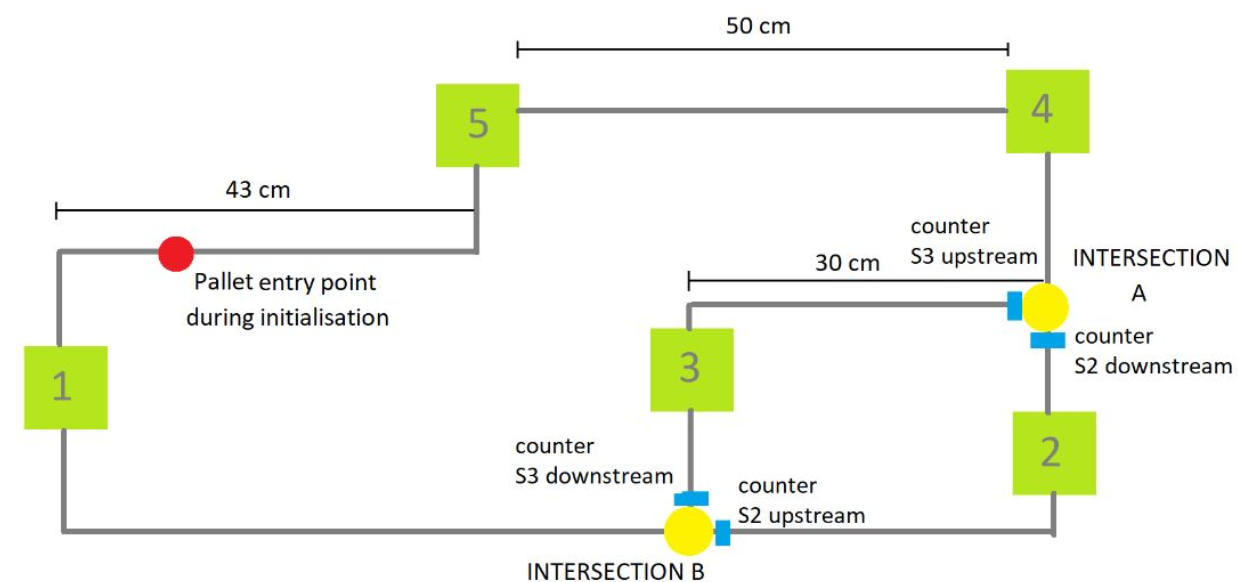

In [41]:
matrix_ptime_TDS = [
    [10,10,10,10],
    [20,20,20,20],
    [30,30,30,30]
]

matrix_ptime_qTDS = [
    [100,100,100],
    [20000,20000,20000],
    [300,300,300],
    [400,400,400],
    [500,500,500]
]

Run validation of logic and input

In [42]:
digital_twin.run_validation(matrix_ptime_qTDS=matrix_ptime_qTDS, matrix_ptime_TDS=matrix_ptime_TDS)

==========  Reading the Model: model_5stations_closed  ==========
===> Big Picture
Total number of Machines: 5
Total number of Queues: 6

===>Detailed view of Queues:
----------------
Queue 1
Arc links: [1, 2]
Capacity: 1
Queue Lenght: 0
----------------
Queue 2
Arc links: [1, 3]
Capacity: 10
Queue Lenght: 0
----------------
Queue 3
Arc links: [2, 4]
Capacity: 10
Queue Lenght: 0
----------------
Queue 4
Arc links: [3, 4]
Capacity: 10
Queue Lenght: 0
----------------
Queue 5
Arc links: [4, 5]
Capacity: 10
Queue Lenght: 0
----------------
Queue 6
Arc links: [5, 1]
Capacity: 10
Parts stored: Part 1
Part Processes for Trace Driven Simulation: None
Parts stored: Part 2
Part Processes for Trace Driven Simulation: None
Parts stored: Part 3
Part Processes for Trace Driven Simulation: None
Queue Lenght: 3

===>Detailed view of Machines:
----------------
> Machine 1
--Queue In:--
Queue 6
--Queue Out:--
Queue 1
Queue 2
---Process Time for quasi Trace Driven Simulation---
None
----------------
> M

## Parallel Test
Here we create a fake real and digital database. Use the data from the real log to create the trace for the digital twin and than compare the real and digital log to see if it's the same

First create a digital twin and run the simulation

==========  Reading the Model: model_5s_closed_no_shadow_real  ==========
===> Big Picture
Total number of Machines: 5
Total number of Queues: 6

===>Detailed view of Queues:
----------------
Queue 1
Arc links: [1, 2]
Capacity: 1
Queue Lenght: 0
----------------
Queue 2
Arc links: [1, 3]
Capacity: 10
Queue Lenght: 0
----------------
Queue 3
Arc links: [2, 4]
Capacity: 10
Queue Lenght: 0
----------------
Queue 4
Arc links: [3, 4]
Capacity: 10
Queue Lenght: 0
----------------
Queue 5
Arc links: [4, 5]
Capacity: 10
Queue Lenght: 0
----------------
Queue 6
Arc links: [5, 1]
Capacity: 10
Parts stored: Part 1
Part Processes for Trace Driven Simulation: None
Parts stored: Part 2
Part Processes for Trace Driven Simulation: None
Parts stored: Part 3
Part Processes for Trace Driven Simulation: None
Queue Lenght: 3

===>Detailed view of Machines:
----------------
> Machine 1
--Queue In:--
Queue 6
--Queue Out:--
Queue 1
Queue 2
---Process Time for quasi Trace Driven Simulation---
None
------------

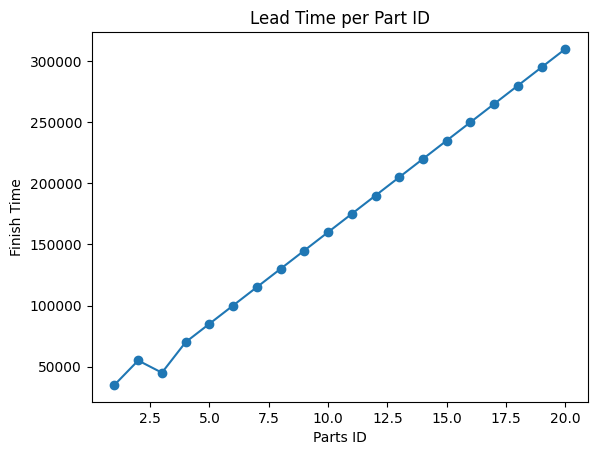

- Maximum Cycle Time: 55001
- Minimum Cycle Time: 35000
>>> Average system cycle time: 44250.0 [time unit]***


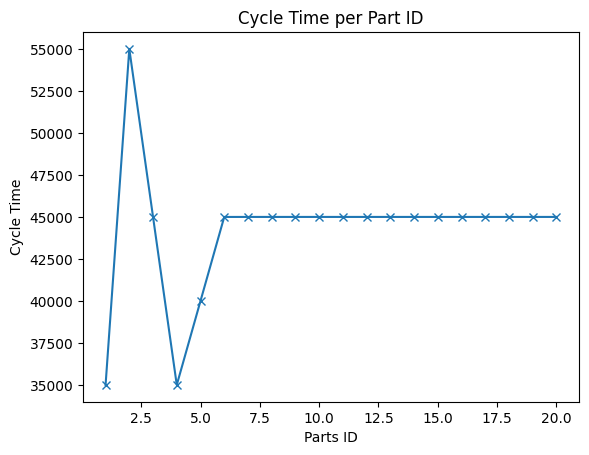

>>> System Throughput: 6.451612903225807e-05 [parts / time unit] 


<Figure size 640x480 with 0 Axes>

In [53]:
digital_twin = Digital_Twin(name= "model_5s_closed_no_shadow_real", initial=True, maxparts=20)
digital_twin.run_digital_model()

We copy the previous database and edit the name replacing digital for real

Change the name of the table from digital log to real log

In [55]:
import sqlite3
conn = sqlite3.connect('databases/real_model_5s_closed_no_shadow_real_db.db')
c = conn.cursor()
c.execute("ALTER TABLE digital_log RENAME TO real_log;")
conn.commit()
conn.close()

In [56]:
digital_twin.run_validation()

==========  Reading the Model: model_5s_closed_no_shadow_real  ==========
===> Big Picture
Total number of Machines: 5
Total number of Queues: 6

===>Detailed view of Queues:
----------------
Queue 1
Arc links: [1, 2]
Capacity: 1
Queue Lenght: 0
----------------
Queue 2
Arc links: [1, 3]
Capacity: 10
Queue Lenght: 0
----------------
Queue 3
Arc links: [2, 4]
Capacity: 10
Queue Lenght: 0
----------------
Queue 4
Arc links: [3, 4]
Capacity: 10
Queue Lenght: 0
----------------
Queue 5
Arc links: [4, 5]
Capacity: 10
Queue Lenght: 0
----------------
Queue 6
Arc links: [5, 1]
Capacity: 10
Parts stored: Part 1
Part Processes for Trace Driven Simulation: None
Parts stored: Part 2
Part Processes for Trace Driven Simulation: None
Parts stored: Part 3
Part Processes for Trace Driven Simulation: None
Queue Lenght: 3

===>Detailed view of Machines:
----------------
> Machine 1
--Queue In:--
Queue 6
--Queue Out:--
Queue 1
Queue 2
---Process Time for quasi Trace Driven Simulation---
None
------------

OperationalError: near ")": syntax error